<a href="https://colab.research.google.com/github/AarushiAiyar/FoDS-Project/blob/main/fods_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup, Imports and Data Loading

We load the dataset directly from a raw GitHub URL into a pandas DataFrame.  
Then we inspect:
- First few rows
- Shape (rows, columns)
- Column data types
- Basic summary stats

This step confirms what features we have and what form they are in.


In [ ]:
# basic libs
import pandas as pd
import numpy as np

# plotting libs
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# load dataset from URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Gunnels.csv"
df = pd.read_csv(url)

# printing first few rows
df.head()

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
0,1,0,786,190,10,0.1,0,3,0,0,0
1,2,0,794,182,10,0.0,0,3,0,0,0
2,3,0,798,178,20,0.0,0,1,0,0,0
3,4,0,800,176,70,0.3,0,1,0,1,0
4,5,0,804,172,40,0.3,0,1,0,1,0


In [ ]:
#checking column names
df.columns

Index(['rownames', 'Gunnel', 'Time', 'Fromlow', 'Slope', 'Rw', 'Amphiso',
       'Subst', 'Pool', 'Water', 'Cobble'],
      dtype='object')

In [ ]:
# check shape
df.shape  # (rows, columns)

(1592, 11)

In [ ]:
# check column dtypes and nulls
df.info()  # data types + missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1592 non-null   int64  
 1   Gunnel    1592 non-null   int64  
 2   Time      1592 non-null   int64  
 3   Fromlow   1592 non-null   int64  
 4   Slope     1592 non-null   int64  
 5   Rw        1592 non-null   float64
 6   Amphiso   1592 non-null   int64  
 7   Subst     1592 non-null   int64  
 8   Pool      1592 non-null   int64  
 9   Water     1592 non-null   int64  
 10  Cobble    1592 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 136.9 KB


In [ ]:
# summary stats for numeric columns
df.describe(include=[np.number])

,rownames,Gunnel,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,796.500000,0.030151,705.243719,149.408920,9.503769,0.527073,0.464196,3.105528,0.202261,0.508794,0.190955
std,459.715129,0.171056,135.853638,82.662326,15.889862,0.421278,0.899039,2.787720,0.401812,0.500080,0.393177
min,1.000000,0.000000,340.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,398.750000,0.000000,623.000000,71.750000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,796.500000,0.000000,712.500000,158.000000,0.000000,0.600000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,1194.250000,0.000000,810.000000,224.250000,10.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000
max,1592.000000,1.000000,983.000000,304.000000,90.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000


# 2. Data Cleaning, Munging, and Preparation

In this step we focus on data handling and preparation for analytics:
- Handle missing values.
- Handle duplicates.
- Convert column types if needed (numeric vs categorical).
- Create ordered / window-based features if meaningful.
- Store a clean working copy.

In [ ]:
# make a working copy
data = df.copy()

# check duplicate rows
data.duplicated().sum()  # number of exact duplicates

np.int64(0)

In [ ]:
# drop duplicate rows if any
data = data.drop_duplicates()

# check missing values per column
data.isna().sum()

,0
rownames,0
Gunnel,0
Time,0
Fromlow,0
Slope,0
Rw,0
Amphiso,0
Subst,0
Pool,0
Water,0


In [ ]:
# we use a simple missing value strategy:
# numeric -> fill with column mean
# categorical -> fill with mode
for col in data.columns:
    if data[col].dtype != 'object':
        # numeric
        data[col] = data[col].fillna(data[col].mean())
    else:
        # categorical
        data[col] = data[col].fillna(data[col].mode()[0])

# confirm no more missing
data.isna().sum()

,0
rownames,0
Gunnel,0
Time,0
Fromlow,0
Slope,0
Rw,0
Amphiso,0
Subst,0
Pool,0
Water,0


# 3. Exploratory Data Analysis

We explore the distributions and relationships in the cleaned data.

We will:
1. Plot histograms / KDEs for numeric columns.
2. Plot boxplots to check for outliers.
3. Plot pairwise relationships (scatterplots).
4. Plot a correlation heatmap.

These visualizations help us understand spread, skew, potential biological patterns, and multicollinearity.

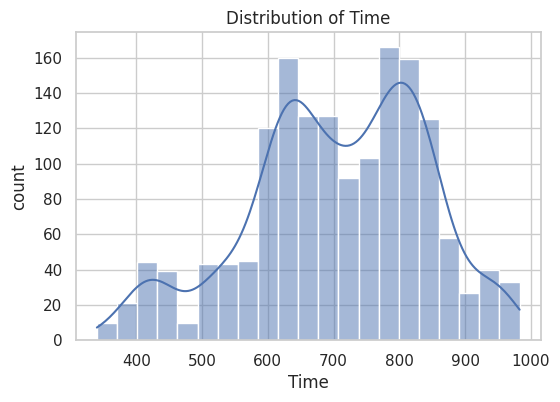

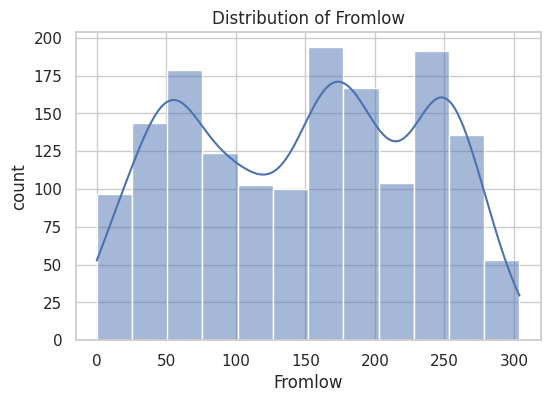

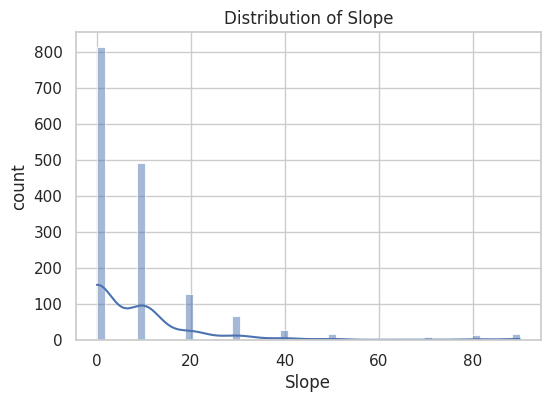

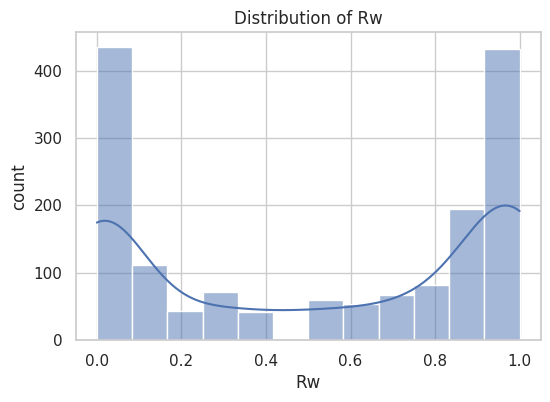

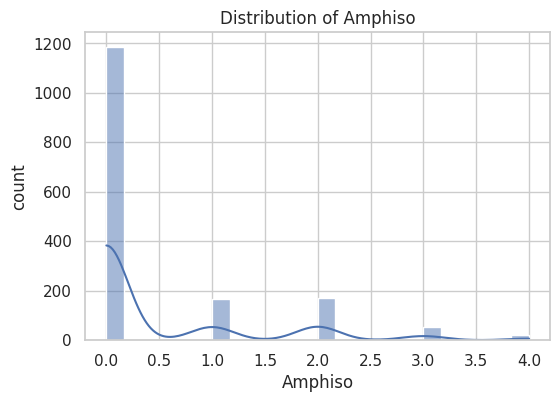

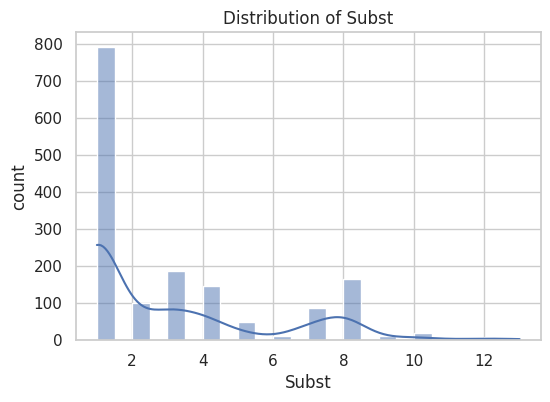

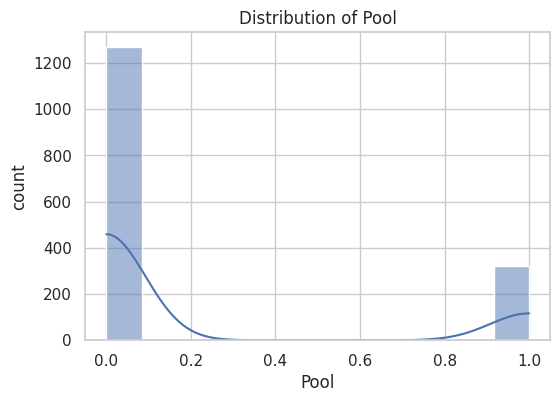

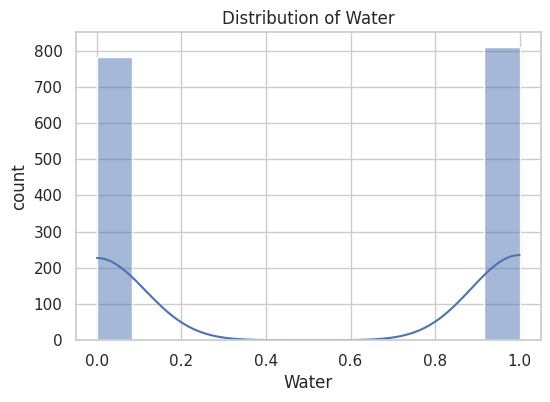

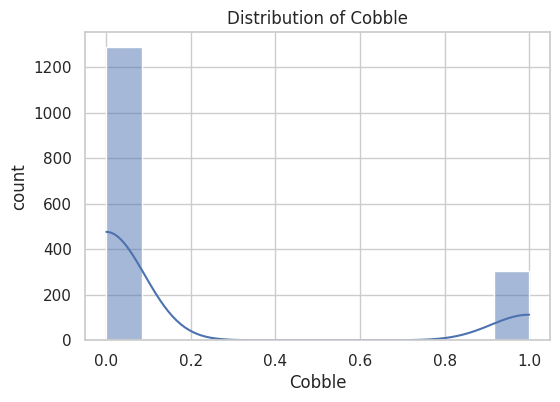

In [ ]:
# choosing meaningful numerical features- skipping row indices etc
plot_cols = ["Time", "Fromlow", "Slope", "Rw", "Amphiso", "Subst", "Pool", "Water", "Cobble"]

for col in plot_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

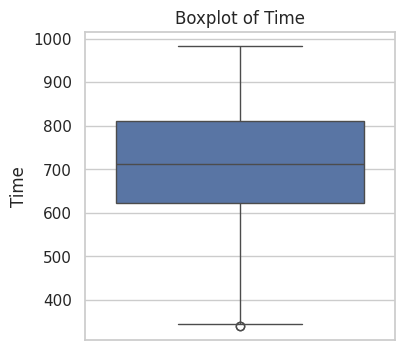

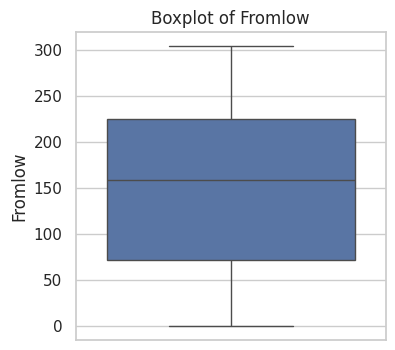

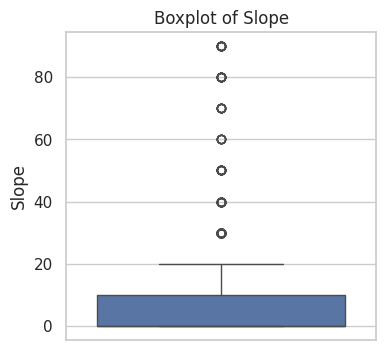

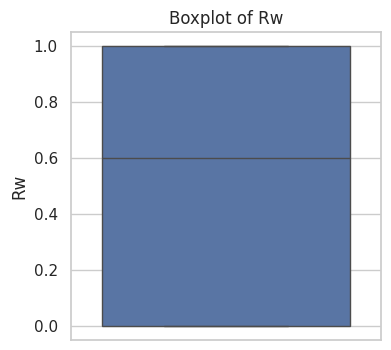

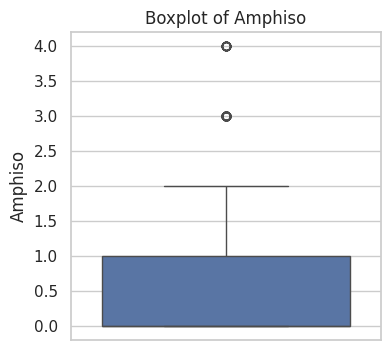

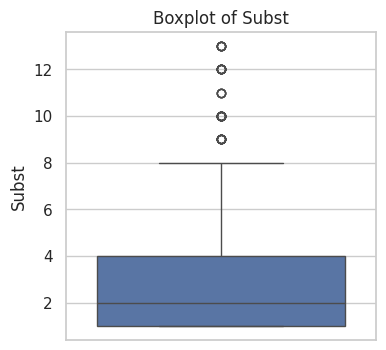

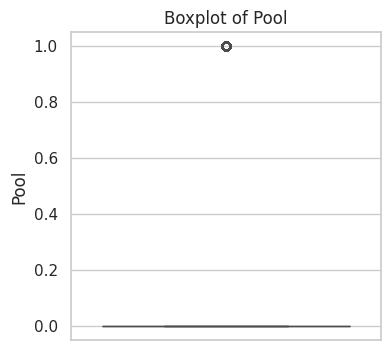

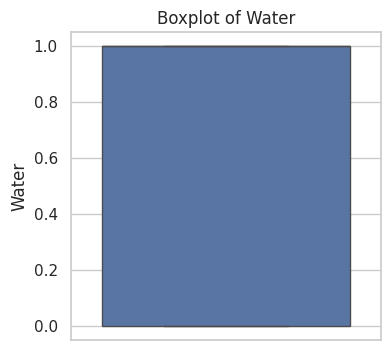

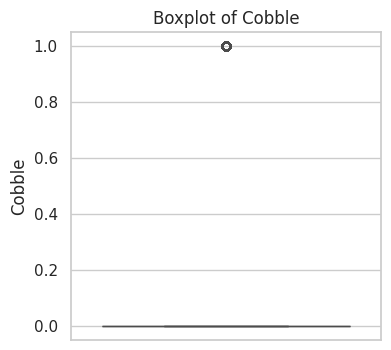

In [ ]:
# choosing meaningful numerical features- skipping row indices etc
num_cols = ["Time", "Fromlow", "Slope", "Rw", "Amphiso", "Subst", "Pool", "Water", "Cobble"]

for col in num_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

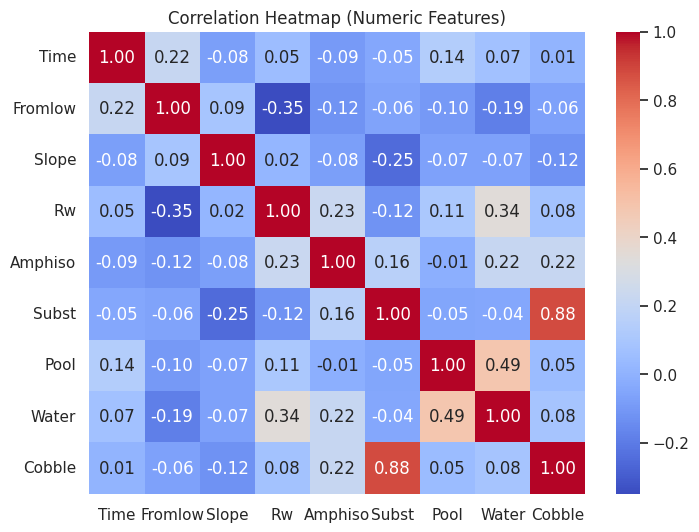

In [ ]:
# correlation heatmap for numeric features
corr = data[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# 4. Ordering, Windowing and Derived Features

To show data preparation for analytics tools, we generate ordered and rolling features.

Steps:
- Sort the dataset by **Time**.
- Create a rolling average and cumulative average of **Rw** to smooth local variation.
- Create a rank column for **Time**.

These steps illustrate windowing, ordering, and data enrichment.

In [ ]:
# sort by Time
data = data.sort_values(by="Time").reset_index(drop=True)

# rolling average of Rw over a 5-sample window
data["Rw_roll5"] = data["Rw"].rolling(window=5, min_periods=1).mean()

# cumulative mean of Rw
data["Rw_cumavg"] = data["Rw"].expanding().mean()

# rank by Time
data["Time_rank"] = data["Time"].rank(method="dense")

# preview columns
data[["Time", "Rw", "Rw_roll5", "Rw_cumavg", "Time_rank"]].head(10)

,Time,Rw,Rw_roll5,Rw_cumavg,Time_rank
0,340,0.5,0.500000,0.500000,1.0
1,341,0.2,0.350000,0.350000,2.0
2,344,0.6,0.433333,0.433333,3.0
3,346,0.0,0.325000,0.325000,4.0
4,348,0.3,0.320000,0.320000,5.0
5,353,0.0,0.220000,0.266667,6.0
6,355,0.0,0.180000,0.228571,7.0
7,361,0.2,0.100000,0.225000,8.0
8,364,0.0,0.100000,0.200000,9.0
9,367,0.0,0.040000,0.180000,10.0


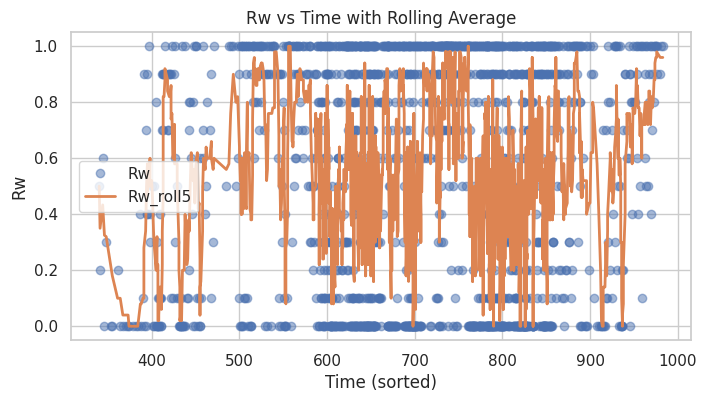

In [ ]:
#plotting

plt.figure(figsize=(8,4))
plt.plot(data["Time"], data["Rw"], marker='o', linestyle='', alpha=0.5, label="Rw")
plt.plot(data["Time"], data["Rw_roll5"], linewidth=2, label="Rw_roll5")
plt.xlabel("Time (sorted)")
plt.ylabel("Rw")
plt.title("Rw vs Time with Rolling Average")
plt.legend()
plt.show()

# 5. Preprocessing for PCA, Clustering and Classification

We now build a clean numeric feature matrix for our modeling tasks.

Steps:
1. Remove the identifier (`rownames`) and target (`Gunnel`) columns.
2. Keep numeric features (`Time`, `Fromlow`, `Slope`, `Rw`, `Amphiso`, `Subst`, `Pool`, `Water`, `Cobble`).
3. Add engineered features (`Rw_roll5`, `Rw_cumavg`, `Time_rank`).
4. Standardize all features for PCA and clustering.

This ensures all variables contribute equally to analysis.


In [ ]:
# select numeric feature columns for modelling
feature_cols = [
    "Time", "Fromlow", "Slope", "Rw", "Amphiso", "Subst",
    "Pool", "Water", "Cobble", "Rw_roll5", "Rw_cumavg", "Time_rank"
]

X_features = data[feature_cols]

# scale features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

X_features.head()

,Time,Fromlow,Slope,Rw,Amphiso,Subst,Pool,Water,Cobble,Rw_roll5,Rw_cumavg,Time_rank
0,340,14,10,0.5,0,5,0,1,0,0.500000,0.500000,1.0
1,341,13,10,0.2,1,3,0,0,0,0.350000,0.350000,2.0
2,344,10,10,0.6,0,3,0,0,0,0.433333,0.433333,3.0
3,346,8,10,0.0,0,3,0,0,0,0.325000,0.325000,4.0
4,348,6,20,0.3,1,9,0,0,1,0.320000,0.320000,5.0


# 6. PCA (Dimensionality Reduction)

We apply Principal Component Analysis (PCA) to reduce dimensionality.

Steps:
1. Fit PCA on the scaled data.
2. Plot explained variance per component.
3. Visualize the first two principal components.

After observing the plot, we will note whether PCA actually helps or not.

In [ ]:
# PCA down to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_

array([0.22733179, 0.18521553])

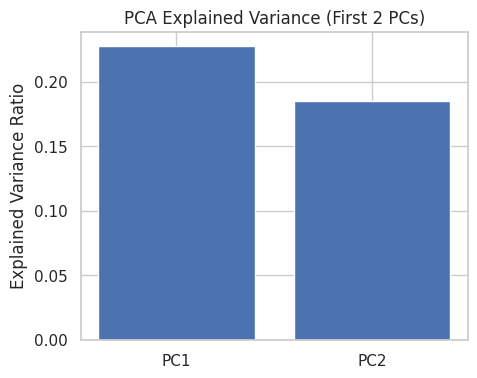

In [ ]:
# barplot

plt.figure(figsize=(5,4))
plt.bar([1,2], pca.explained_variance_ratio_, tick_label=["PC1","PC2"])
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance (First 2 PCs)")
plt.show()

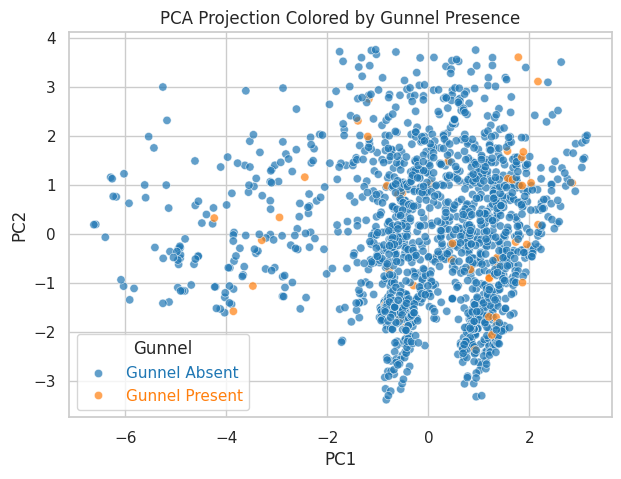

In [ ]:
# map 0/1 to friendly labels
label_map = {0: "Gunnel Absent", 1: "Gunnel Present"}
hue_series = df["Gunnel"].map(label_map)

plt.figure(figsize=(7,5))
ax = sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=hue_series,
    hue_order=["Gunnel Absent", "Gunnel Present"],              # fixed order
    palette={"Gunnel Absent":"#1f77b4", "Gunnel Present":"#ff7f0e"},
    alpha=0.7
)
plt.title("PCA Projection Colored by Gunnel Presence")
plt.xlabel("PC1"); plt.ylabel("PC2")

# color the legend labels themselves
leg = ax.legend(title="Gunnel")
legend_colors = ["#1f77b4", "#ff7f0e"]
for txt, col in zip(leg.get_texts(), legend_colors):
    txt.set_color(col)

plt.show()

In this step, I visualized the PCA output by separating the samples based on whether Gunnel fish were present or not. The plot shows each point in the new 2D PCA space, colored by class. Since the orange (present) and blue (absent) points overlap heavily, it indicates that Gunnel presence cannot be clearly separated in two dimensions. This means the dataset depends on multiple interacting environmental factors, and no single pair of features can fully explain the difference.

# 7. K-Means Clustering

We now apply **K-Means clustering** to explore if the observations form natural groups
based on their environmental variables.

Steps:
1. Fit K-Means on the scaled features.
2. Fit K-Means again on PCA-reduced features.
3. Visualize both sets of clusters in PCA space.
4. Compare whether PCA helped reveal clearer separation.

In [ ]:
# choosing number of clusters
k = 3

# K-Means on original scaled features
kmeans_raw = KMeans(n_clusters=k, random_state=42, n_init="auto")
clusters_raw = kmeans_raw.fit_predict(X_scaled)

# K-Means on PCA-reduced data (2D)
kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init="auto")
clusters_pca = kmeans_pca.fit_predict(X_pca)

# attach cluster labels
data["cluster_raw"] = clusters_raw
data["cluster_pca"] = clusters_pca

data[["cluster_raw", "cluster_pca"]].head()

,cluster_raw,cluster_pca
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


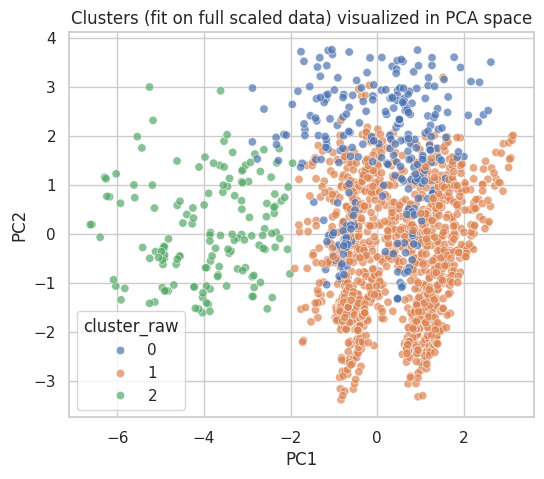

In [ ]:
# visualize clusters from raw features

plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=data["cluster_raw"],
    palette="deep", alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters (fit on full scaled data) visualized in PCA space")
plt.legend(title="cluster_raw")
plt.show()

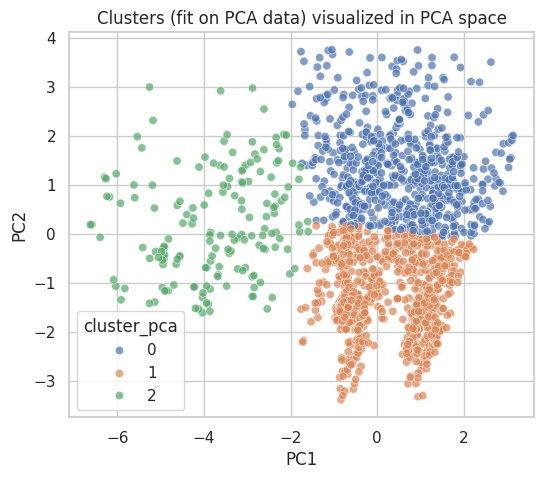

In [ ]:
#visualize clusters from PCA data

plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=data["cluster_pca"],
    palette="deep", alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters (fit on PCA data) visualized in PCA space")
plt.legend(title="cluster_pca")
plt.show()

K-Means was applied on both the full scaled feature set and the PCA-reduced data.

- The clusters formed on raw data were overlapping, showing weak separation.  
- After PCA, cluster boundaries became visually clearer, indicating that PCA improved structure visualization.  
- Therefore, while PCA did not significantly reduce dimensionality, it added value by enhancing interpretability during clustering.


# 8. Random Forest Classification

We apply a **Random Forest Classifier** to predict the presence (`1`) or absence (`0`) of Gunnel fish
based on environmental conditions.

Steps:
1. Split the data into training and testing sets.
2. Train a Random Forest model.
3. Evaluate accuracy, precision, recall, and F1-score.
4. Plot a confusion matrix and feature importances.

This model helps identify which variables most influence Gunnel presence.

In [ ]:
# split and train model

# target variable: Gunnel presence (0/1)
y = data["Gunnel"].values

# input features: environmental + engineered
X_for_rf = data[feature_cols]

# scale features (tree models don't need scaling, but we’ll keep it consistent)
rf_scaler = StandardScaler()
X_rf_scaled = rf_scaler.fit_transform(X_for_rf)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_rf_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# initialize and train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)

# predictions
y_pred_rf = rf.predict(X_test)

# evaluation metrics
acc_rf  = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, zero_division=0)
rec_rf  = recall_score(y_test, y_pred_rf, zero_division=0)
f1_rf   = f1_score(y_test, y_pred_rf, zero_division=0)

acc_rf, prec_rf, rec_rf, f1_rf

(0.9723618090452262, 1.0, 0.08333333333333333, 0.15384615384615385)

In [ ]:
# detailed classification report

print(classification_report(
    y_test, y_pred_rf,
    zero_division=0,
    target_names=["No Gunnel","Gunnel"]
))

              precision    recall  f1-score   support

   No Gunnel       0.97      1.00      0.99       386
      Gunnel       1.00      0.08      0.15        12

    accuracy                           0.97       398
   macro avg       0.99      0.54      0.57       398
weighted avg       0.97      0.97      0.96       398



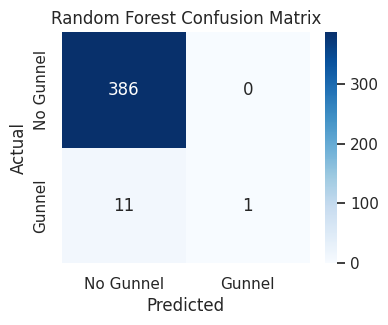

In [ ]:
# confusion matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4,3))
sns.heatmap(
    cm_rf, annot=True, fmt='d', cmap="Blues",
    xticklabels=["No Gunnel","Gunnel"],
    yticklabels=["No Gunnel","Gunnel"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

The Random Forest classifier achieved an **overall accuracy of ~97%**, which at first looks very high.

However, precision and recall reveal an imbalance:
- **Precision for Gunnel (1.00)** → whenever the model predicts “Gunnel,” it’s always right.  
- **Recall for Gunnel (0.08)** → but it rarely predicts “Gunnel” at all — it misses most actual positives.  
- **F1-score for Gunnel (0.15)** → confirms weak performance on the minority class.

The confusion matrix shows that the model correctly identified almost all “No Gunnel” samples, but struggled with “Gunnel” detections (only 1 out of 12 was caught).  
This happened because the dataset is **highly imbalanced** — there are far more “No Gunnel” entries than “Gunnel” ones.

The Random Forest performs well overall but is biased toward predicting the majority (No Gunnel) class.

The high accuracy comes from class imbalance rather than genuine detection performance.  

A future improvement could involve techniques like oversampling (SMOTE) or class weights to balance predictions.

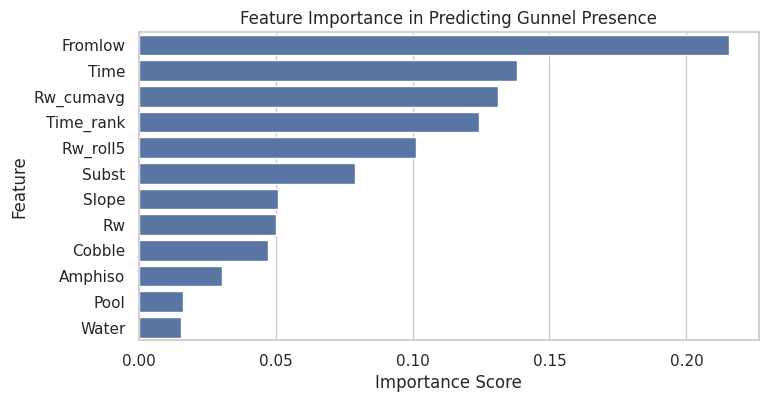

,0
Fromlow,0.215571
Time,0.138034
Rw_cumavg,0.131161
Time_rank,0.124150
Rw_roll5,0.101296
Subst,0.079123
Slope,0.050968
Rw,0.050246
Cobble,0.047401
Amphiso,0.030593


In [ ]:
# feature importance
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance in Predicting Gunnel Presence")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

importances

The Random Forest model highlights which environmental factors most influence
the presence of Gunnel fish:

1. **Fromlow** (distance from low-tide line) – the strongest predictor.
   Gunnels are coastal fish, so proximity to the low-tide zone is critical.
2. **Time** – the sampling or observation time, which may correspond to tidal phase or day–night variation.
3. **Rw_cumavg** and **Rw_roll5** – measures of rolling and cumulative water readings, suggesting that sustained
   water conditions affect habitat suitability.
4. **Time_rank** – a derived time ordering feature also contributes moderately.
5. **Subst** and **Slope** – describe substrate type and terrain angle, both relevant to shelter and feeding grounds.

Features such as **Water**, **Pool**, and **Amphiso** show minimal importance,
indicating limited direct influence on Gunnel presence.

Gunnel occurrence is primarily driven by spatial (Fromlow), temporal (Time),
and sustained hydrological factors (Rw-based metrics), while surface water
and pool variables contribute less.


# 9. Logistic Regression

To compare with the Random Forest model, we apply a **Logistic Regression**
classifier to predict Gunnel presence (`0` = No Gunnel, `1` = Gunnel).

Steps:
1. Train/test split (same as before).  
2. Train Logistic Regression on the scaled data.  
3. Evaluate accuracy, precision, recall, and F1-score.  
4. Display a confusion matrix for comparison.

This model serves as a linear baseline for classification performance.

In [ ]:
# train and evaluate the model

# logistic regression on same scaled features
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# predictions
y_pred_log = log_reg.predict(X_test)

# metrics
acc_log  = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log, zero_division=0)
rec_log  = recall_score(y_test, y_pred_log, zero_division=0)
f1_log   = f1_score(y_test, y_pred_log, zero_division=0)

acc_log, prec_log, rec_log, f1_log

(0.964824120603015, 0.0, 0.0, 0.0)

In [ ]:
# detailed classification report

print(classification_report(
    y_test, y_pred_log,
    zero_division=0,
    target_names=["No Gunnel","Gunnel"]
))

              precision    recall  f1-score   support

   No Gunnel       0.97      0.99      0.98       386
      Gunnel       0.00      0.00      0.00        12

    accuracy                           0.96       398
   macro avg       0.48      0.50      0.49       398
weighted avg       0.94      0.96      0.95       398



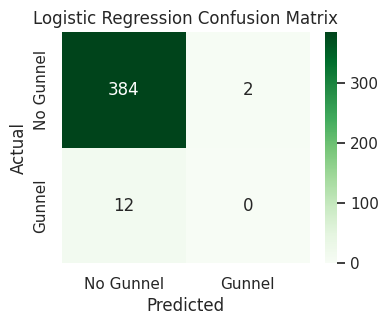

In [ ]:
# confusion matrix

cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(4,3))
sns.heatmap(
    cm_log, annot=True, fmt='d', cmap="Greens",
    xticklabels=["No Gunnel","Gunnel"],
    yticklabels=["No Gunnel","Gunnel"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

The Logistic Regression model reached an accuracy of **~96%**, similar to the Random Forest.
However, it completely failed to detect any of the “Gunnel present” cases
(precision = 0, recall = 0, F1 = 0).

This means:
- The model correctly predicted almost all “No Gunnel” samples.
- It predicted every actual Gunnel site as “No Gunnel”.
- The high accuracy again results from **class imbalance**, not actual predictive success.

The confusion matrix shows this clearly: all 12 true Gunnel cases were missed.

Logistic Regression struggled to capture the minority class due to its linear nature and the severe imbalance in the dataset. It confirms that the relationship between environmental variables and Gunnel presence is **non-linear**, which explains why Random Forest performed slightly better overall.

# 10. Conclusion

**Project Summary**

This study analyzed environmental and site characteristics to understand the
presence of **Gunnel fish** using a combination of exploratory data analysis,
dimensionality reduction, clustering, and classification models.

Workflow:
- **Data Handling and Cleaning:** Ensured consistency, numeric typing, and feature engineering.
- **EDA:** Identified key variable ranges and correlations between slope, water, and substrate.
- **Dimensionality Reduction (PCA):** Reduced complexity; variance explained (~40%) but
  improved visualization and separation of patterns.
- **Clustering (K-Means):** Revealed three broad environmental groupings, clearer when using PCA.
- **Classification (Random Forest, Logistic Regression):** Predicted Gunnel presence using environmental predictors.

---

**Feature Importance**

The Random Forest model revealed that the most influential variables are:
**Fromlow**, **Time**, **Rw_cumavg**, **Time_rank**, and **Rw_roll5**.
These reflect proximity to the low-tide zone, temporal variation, and water
conditions — all strong ecological indicators of Gunnel habitat suitability.

---

**Key Findings**
- PCA aided visualization but added limited predictive value.
- K-Means exposed underlying environmental structure.
- Random Forest performed best overall, handling non-linear relationships.
- Both classifiers showed bias due to class imbalance (few Gunnel samples).
- Future improvements could include **resampling techniques (SMOTE)**,
  **class weighting**, or **data augmentation** to better capture minority patterns.

---

**Final Summary**

This project demonstrates how a complete data analytics pipeline — from EDA to modeling — can be applied to ecological datasets.  

Despite limited predictive success for the rare class, the analysis identified key environmental factors influencing Gunnel distribution, providing valuable groundwork for future modeling or data collection efforts.


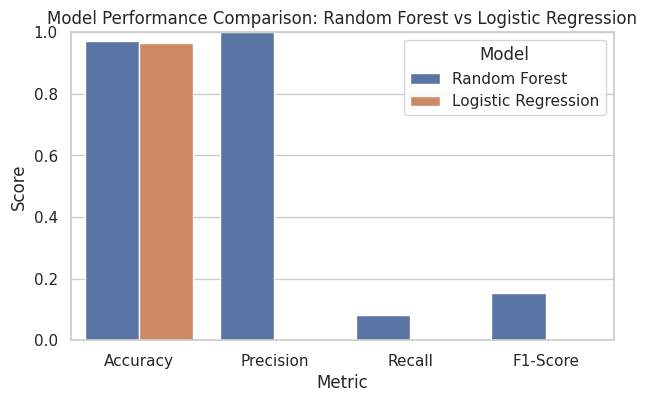

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.972362,1.0,0.083333,0.153846
1,Logistic Regression,0.964824,0.0,0.000000,0.000000


In [ ]:
#performance metrics comparison
models = ['Random Forest', 'Logistic Regression']
accuracy = [acc_rf, acc_log]
precision = [prec_rf, prec_log]
recall = [rec_rf, rec_log]
f1 = [f1_rf, f1_log]

metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

metrics_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(7,4))
sns.barplot(data=metrics_df_melted, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison: Random Forest vs Logistic Regression')
plt.ylim(0,1)
plt.legend(title='Model')
plt.show()

metrics_df